In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [ ]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


# -----------------------------------------------------------------
# 1. Check for Missing Values
# -----------------------------------------------------------------

In [ ]:
# Checking for missing values in each dataset
print("Missing Values in Customers:")
print(customers.isnull().sum())

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [ ]:
print("\nMissing Values in Products:")
print(products.isnull().sum())


Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [ ]:
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
print("\nDuplicate Entries in Customers:", customers.duplicated().sum())



Duplicate Entries in Customers: 0


In [ ]:
print("Duplicate Entries in Products:", products.duplicated().sum())


Duplicate Entries in Products: 0


In [ ]:
print("Duplicate Entries in Transactions:", transactions.duplicated().sum())


Duplicate Entries in Transactions: 0


# -----------------------------------------------------------------
# 2. Data Distribution
# -----------------------------------------------------------------


In [ ]:
# Customers by region
customers_by_region = customers['Region'].value_counts()
print("\nCustomers by Region:")
print(customers_by_region)


Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [ ]:
# Distribution of product categories
categories_distribution = products['Category'].value_counts()
print("\nProduct Categories Distribution:")
print(categories_distribution)


Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [ ]:
# Distribution of transaction dates
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])  # Convert to datetime
transactions_per_month = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("\nTransactions Per Month:")
print(transactions_per_month)


Transactions Per Month:
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64



# -----------------------------------------------------------------
# 3. Correlations
# -----------------------------------------------------------------

In [ ]:
# Analyzing correlations between numerical variables in merged_data
correlation_matrix = merged_data[['Quantity', 'Price_x', 'TotalValue']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Quantity   Price_x  TotalValue
Quantity    1.000000 -0.009378    0.609972
Price_x    -0.009378  1.000000    0.722714
TotalValue  0.609972  0.722714    1.000000


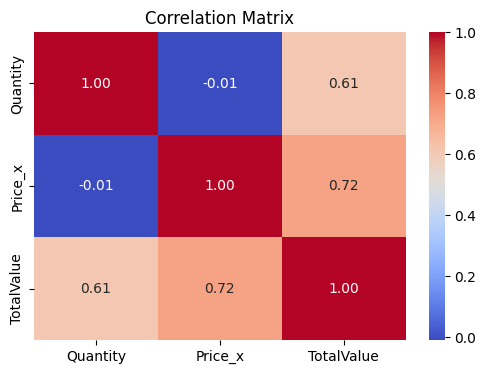

In [ ]:
# Visualizing the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# -----------------------------------------------------------------
# 4. Aggregations
# -----------------------------------------------------------------

In [ ]:
# Total revenue by category
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Category:")
print(revenue_by_category)


Total Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [ ]:
# Customer lifetime value
customer_lifetime_value = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("\nCustomer Lifetime Value (Top 5 Customers):")
print(customer_lifetime_value.head(5))


Customer Lifetime Value (Top 5 Customers):
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [ ]:
# Most popular products (by quantity sold)
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nMost Popular Products (Top 5 by Quantity Sold):")
print(popular_products)


Most Popular Products (Top 5 by Quantity Sold):
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [ ]:
# Importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Calculating percentage contribution of each category to total revenue
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum()
total_revenue = revenue_by_category.sum()
revenue_percentage = np.floor((revenue_by_category / total_revenue) * 100).values

<ipython-input-126-275b1c0d07fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-126-275b1c0d07fc>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


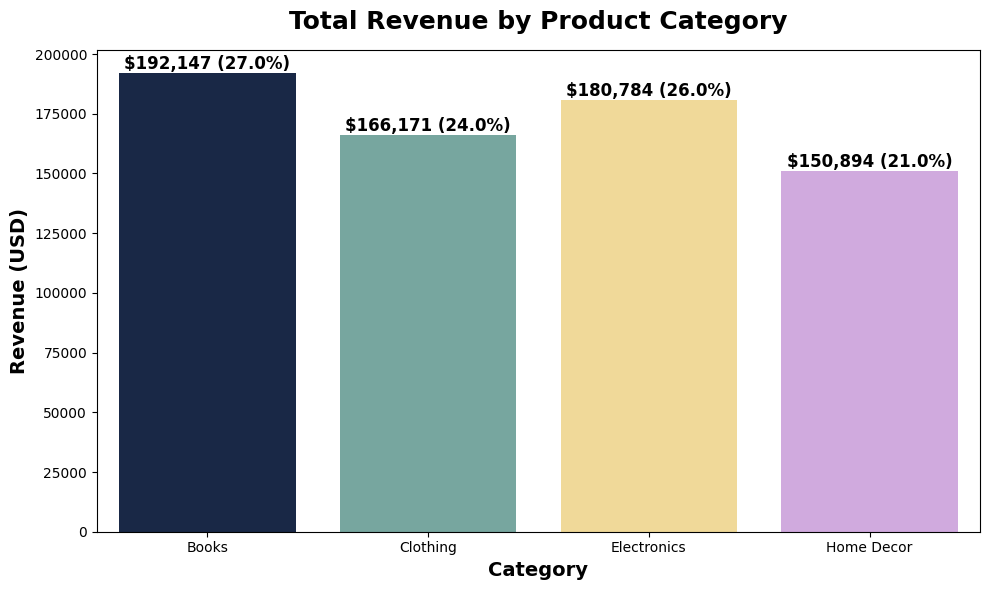

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x=revenue_by_category.index,
    y=revenue_by_category.values,
    palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"]
)
plt.title('Total Revenue by Product Category', fontweight='black', pad=15, size=18)
plt.xlabel('Category', size=14, fontweight='bold')
plt.ylabel('Revenue (USD)', size=14, fontweight='bold')

# Adding annotations for revenue and percentage
for index, value in enumerate(revenue_by_category.values):
    plt.text(
        index, value,
        f"${value:,.0f} ({revenue_percentage[index]}%)",
        ha="center", va="bottom", fontweight="bold", size=12
    )

plt.tight_layout()
plt.show()


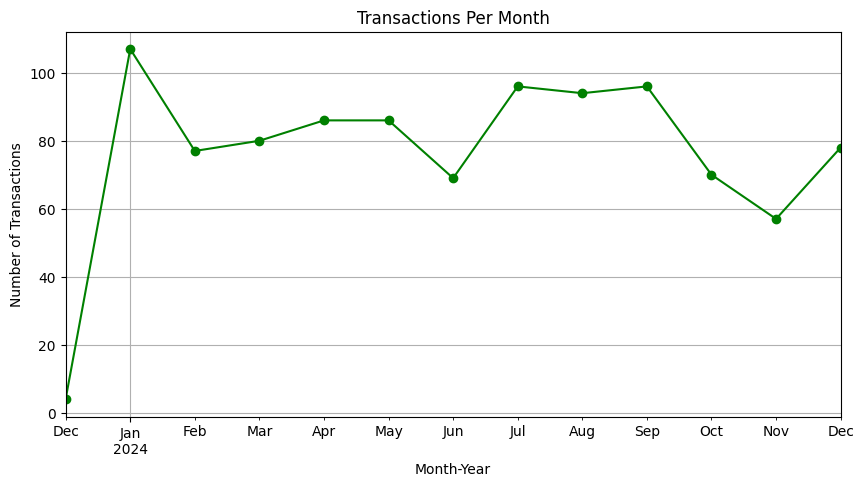

In [ ]:
# Visualizing transactions per month
plt.figure(figsize=(10, 5))
transactions_per_month.plot(kind='line', marker='o', color='green')
plt.title('Transactions Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# -----------------------------------------------------------------
# **1. Top Performing Regions and Customer Base Distribution**
# -----------------------------------------------------------------

In [ ]:
customers_by_region = customers['Region'].value_counts()

<ipython-input-129-6ecd42bf381b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customers_by_region.index, y=customers_by_region.values, palette='viridis')


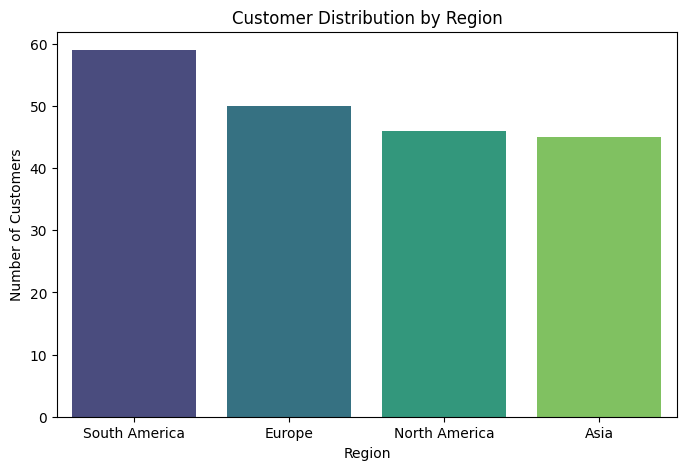

In [ ]:
# Counting customers by region
customers_by_region = customers['Region'].value_counts()

# Visualizing customer distribution by region
plt.figure(figsize=(8, 5))
sns.barplot(x=customers_by_region.index, y=customers_by_region.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-130-8e89cdb136f5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-130-8e89cdb136f5>:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


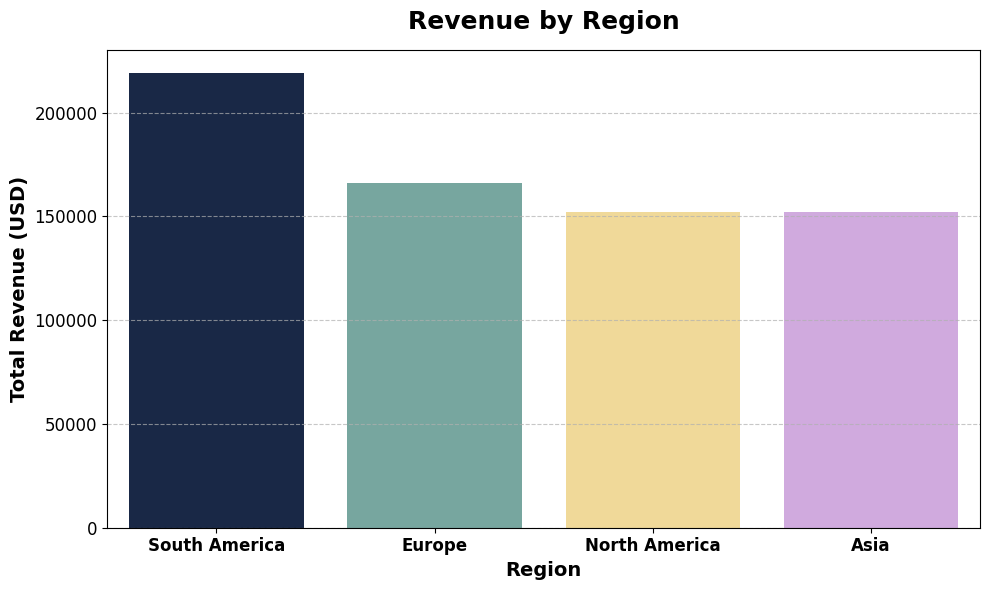

In [ ]:
# Calculating revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Calculating percentage contribution for each region
total_revenue = revenue_by_region.sum()
region_percentage = np.floor((revenue_by_region / total_revenue) * 100).values

plt.figure(figsize=(10, 6))
sns.barplot(
    x=revenue_by_region.index,
    y=revenue_by_region.values,
    palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"]
)
plt.title('Revenue by Region', fontweight='black', pad=15, size=18)
plt.xlabel('Region', size=14, fontweight='bold')
plt.ylabel('Total Revenue (USD)', size=14, fontweight='bold')
plt.xticks(size=12, fontweight='bold')
plt.yticks(size=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# -----------------------------------------------------------------
# **2. Most Popular Product Categories and Products**
# -----------------------------------------------------------------

<ipython-input-131-3c619ba9b7e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="pastel")


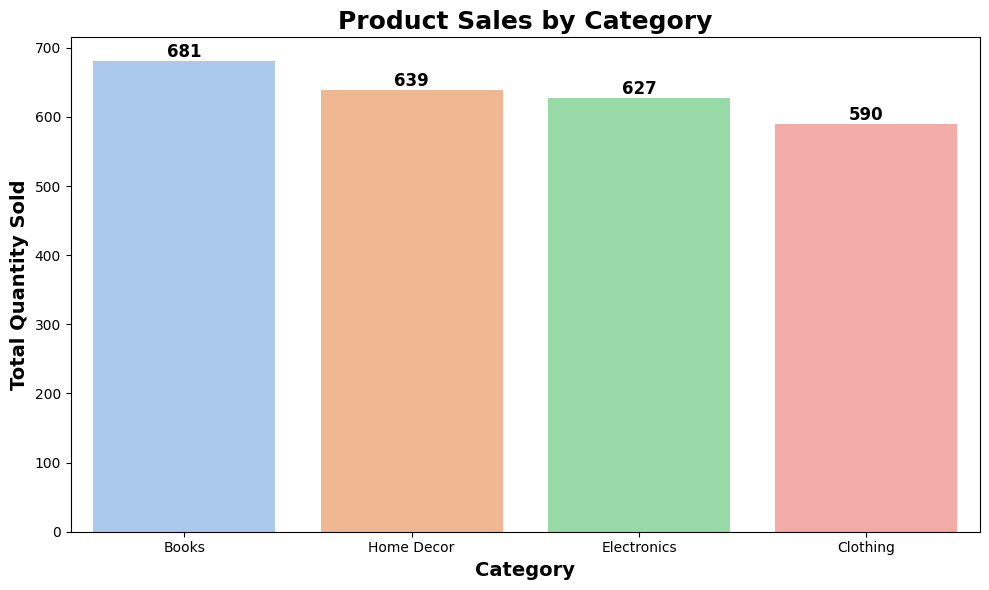

In [ ]:
# Counting sales by product category
sales_by_category = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Visualizing product sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="pastel")
plt.title('Product Sales by Category', fontweight='bold', size=18)
plt.xlabel('Category', fontweight='bold', size=14)
plt.ylabel('Total Quantity Sold', fontweight='bold', size=14)

# Adding annotations
for index, value in enumerate(sales_by_category.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold', size=12)

plt.tight_layout()
plt.show()


<ipython-input-132-747b263ddedf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="crest")


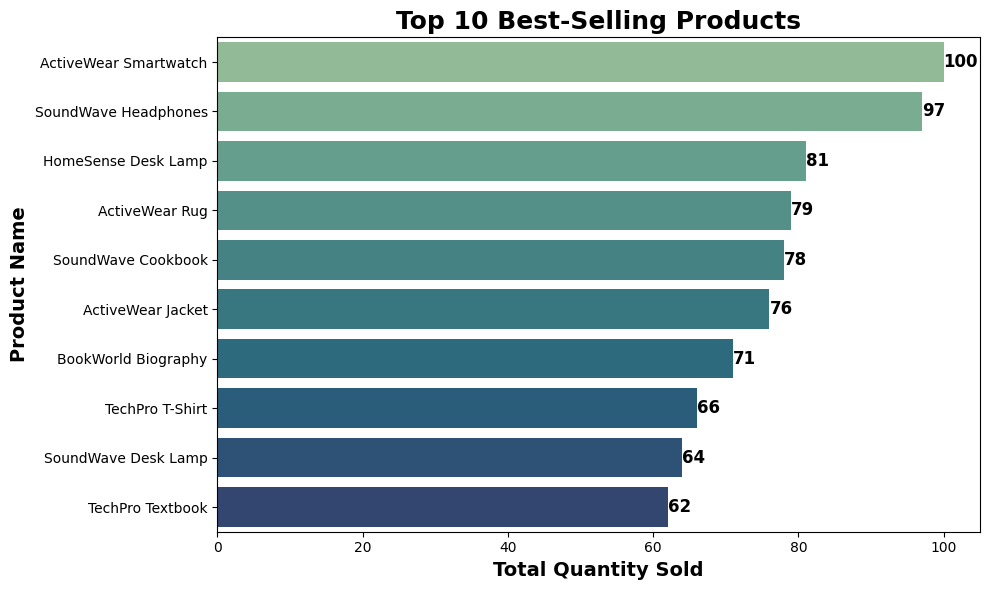

In [ ]:
# Most popular products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualizing top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title('Top 10 Best-Selling Products', fontweight='bold', size=18)
plt.xlabel('Total Quantity Sold', fontweight='bold', size=14)
plt.ylabel('Product Name', fontweight='bold', size=14)

# Adding annotations
for index, value in enumerate(top_products.values):
    plt.text(value, index, str(value), ha='left', va='center', fontweight='bold', size=12)

plt.tight_layout()
plt.show()


<ipython-input-133-50a71ebcafdf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")


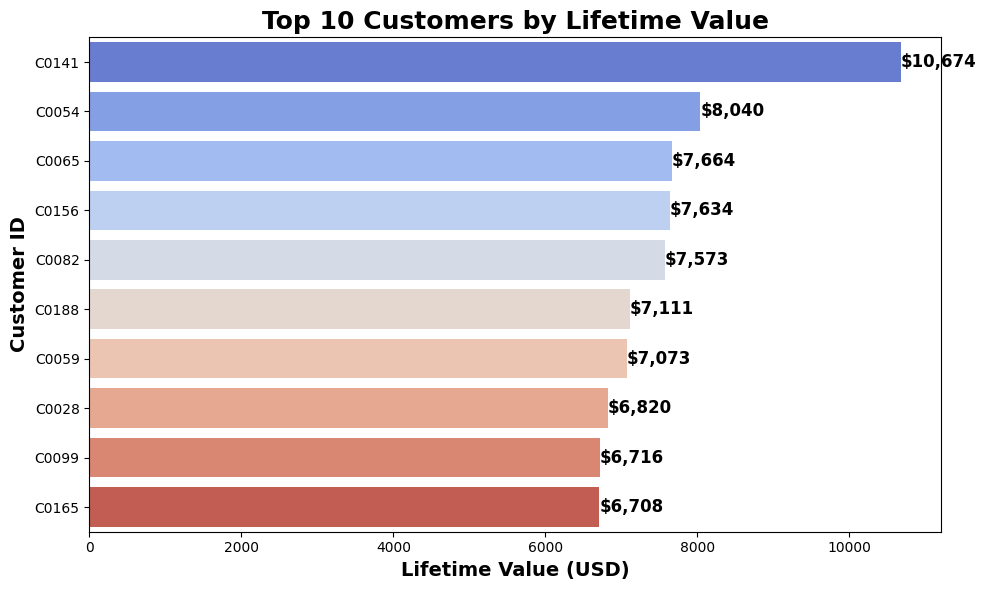

In [ ]:
# Total revenue per customer
customer_lifetime_value = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Visualizing top 10 high-value customers
top_customers = customer_lifetime_value.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")
plt.title('Top 10 Customers by Lifetime Value', fontweight='bold', size=18)
plt.xlabel('Lifetime Value (USD)', fontweight='bold', size=14)
plt.ylabel('Customer ID', fontweight='bold', size=14)


for index, value in enumerate(top_customers.values):
    plt.text(value, index, f"${value:,.0f}", ha='left', va='center', fontweight='bold', size=12)

plt.tight_layout()
plt.show()


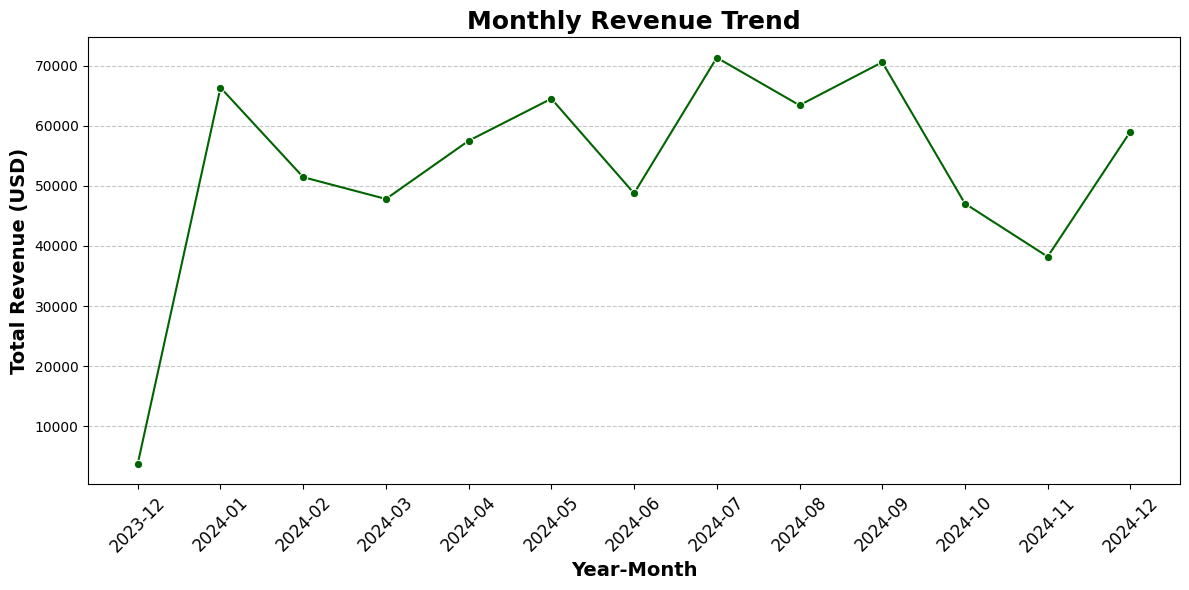

In [ ]:

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

# Monthly revenue trend
monthly_revenue = merged_data.groupby('YearMonth')['TotalValue'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker='o', color='darkgreen')
plt.title('Monthly Revenue Trend', fontweight='bold', size=18)
plt.xlabel('Year-Month', fontweight='bold', size=14)
plt.ylabel('Total Revenue (USD)', fontweight='bold', size=14)
plt.xticks(rotation=45, size=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

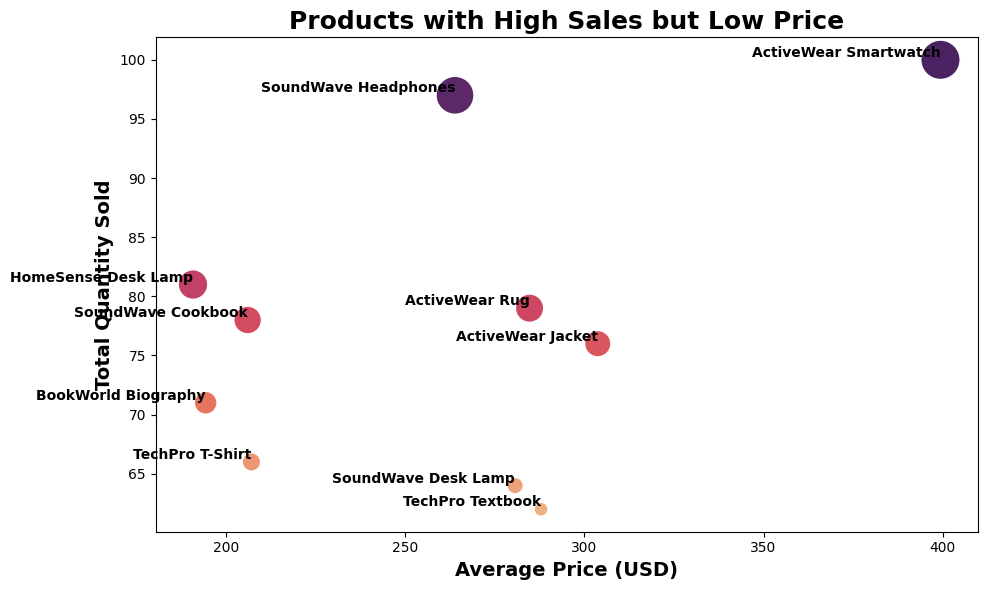

In [ ]:
# Analyzing products with high quantity sold and low prices
low_price_high_sales = merged_data.groupby('ProductName').agg(
    {'Quantity': 'sum', 'Price_x': 'mean'}
).sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Price_x', y='Quantity', data=low_price_high_sales,
    hue='Quantity', size='Quantity', sizes=(100, 800), palette='flare', legend=False
)
plt.title('Products with High Sales but Low Price', fontweight='bold', size=18)
plt.xlabel('Average Price (USD)', fontweight='bold', size=14)
plt.ylabel('Total Quantity Sold', fontweight='bold', size=14)

# Add annotations
for i in range(len(low_price_high_sales)):
    plt.text(
        x=low_price_high_sales['Price_x'].iloc[i],
        y=low_price_high_sales['Quantity'].iloc[i],
        s=low_price_high_sales.index[i],
        fontsize=10, fontweight='bold', ha='right', va='bottom'
    )

plt.tight_layout()
plt.show()
